In [1]:
import pandas as pd

In [2]:
pyspark_df = pd.read_csv("data job posts.csv")

pyspark_df.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [3]:
pyspark_df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [4]:
pyspark_df.isnull().sum()

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64

In [ ]:

'''
How people respond to IT-related jobs in relation to non-IT jobs
Which company asdvertised the most IT jobs


'''

In [5]:
pyspark_df.shape

(19001, 24)

In [26]:
pyspark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [29]:
pyspark_df.describe()

,Year,Month
count,19001.000000,19001.000000
mean,2010.274722,6.493869
std,3.315609,3.405503
min,2004.000000,1.000000
25%,2008.000000,3.000000
50%,2011.000000,7.000000
75%,2013.000000,9.000000
max,2015.000000,12.000000


In [13]:
pyspark_df['Company'].unique()

array(['AMERIA Investment Consulting Company',
       'International Research & Exchanges Board (IREX)',
       'Caucasus Environmental NGO Network (CENN)', ...,
       '"HayTech Solutions" LLC', 'NASDAQ OMX Armenia OJSC',
       'Technolinguistics NGO'], dtype=object)

In [18]:
pyspark_df.duplicated().sum()

39

In [31]:
# dropping the 39 duplicated rows

pyspark_df.drop_duplicates(subset = 'jobpost', keep = 'first', inplace= True)

In [32]:
pyspark_df.duplicated().sum()

0

In [30]:
# checking the unique values of each columns in our dataframe
pyspark_df.nunique()

jobpost             18892
date                 4391
Title                8636
Company              4554
AnnouncementCode     1014
Term                  411
Eligibility           663
Audience              216
StartDate            1186
Duration             1515
Location              759
JobDescription      12861
JobRequirment       14182
RequiredQual        16688
Salary               2692
ApplicationP        14187
OpeningDate          3344
Deadline             5202
Notes                1031
AboutC               6016
Attach               1495
Year                   12
Month                  12
IT                      2
dtype: int64

In [34]:
# dropping columns with many null vales

import numpy as np

pyspark_df.drop(['AnnouncementCode', 'Term', 'Eligibility', 'Audience', 'Notes', 'Attach'], axis = 1, inplace = True)

In [35]:
pyspark_df.head()

,jobpost,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,AboutC,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,The International Research & Exchanges Board (...,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,The Caucasus Environmental NGO Network is a\r\...,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,2004,1,True


In [36]:
pyspark_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18892 entries, 0 to 19000
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         18892 non-null  object
 1   date            18892 non-null  object
 2   Title           18865 non-null  object
 3   Company         18886 non-null  object
 4   StartDate       9641 non-null   object
 5   Duration        10762 non-null  object
 6   Location        18861 non-null  object
 7   JobDescription  15059 non-null  object
 8   JobRequirment   16429 non-null  object
 9   RequiredQual    18458 non-null  object
 10  Salary          9590 non-null   object
 11  ApplicationP    18840 non-null  object
 12  OpeningDate     18236 non-null  object
 13  Deadline        18835 non-null  object
 14  AboutC          12377 non-null  object
 15  Year            18892 non-null  int64 
 16  Month           18892 non-null  int64 
 17  IT              18892 non-null  bool  
dtypes: boo

In [39]:
cmpy = pyspark_df.groupby('Company')['Company'].count()
cmpy.head(20)

Company
""Aregak" Universal Credit Organization" CJSC    7
""Armenia" International Airport" CJSC           1
""Armenia" International Airports" CJCS          1
""Armenia" International Airports" CJSC          3
"4h" LLC                                         4
"A.B." LLC                                       1
"ABM Soft Prof" Ltd.                             2
"ACBA-Credit Agricole Bank" CJSC                 3
"ACRA Credit Reporting CJSC                      1
"ACRA Credit Reporting" CJSC                     6
"ADF Shops" CJSC                                 5
"ALGO" Educational Center                        3
"AMI Novosti-Armenia" Information Agency LLC     2
"ARGE Business" LLC                              1
"ATP" Charitable Foundation                      1
"AV TV" Limited Liability Company                1
"AVC Balance" LTD                                1
"Aalyst" Ltd                                     1
"Abser" LLC                                      1
"Accept" LTD           

In [46]:
pyspark_df.nunique()

jobpost           18892
date               4382
Title              8636
Company            4554
StartDate          1186
Duration           1515
Location            759
JobDescription    12861
JobRequirment     14182
RequiredQual      16688
Salary             2692
ApplicationP      14187
OpeningDate        3344
Deadline           5202
AboutC             6016
Year                 12
Month                12
IT                    2
dtype: int64

In [22]:
pyspark_df['Company'].unique()

array(['AMERIA Investment Consulting Company',
       'International Research & Exchanges Board (IREX)',
       'Caucasus Environmental NGO Network (CENN)', ...,
       '"HayTech Solutions" LLC', 'NASDAQ OMX Armenia OJSC',
       'Technolinguistics NGO'], dtype=object)

In [21]:
pyspark_df['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [23]:
pyspark_df['IT'].dtype

dtype('bool')

In [24]:
pyspark_df['Deadline'].dtype

dtype('O')

In [25]:
pyspark_df.dtypes

jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

C:\Users\Evvuga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


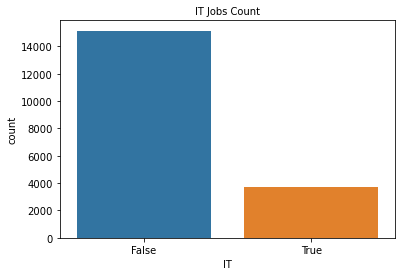

In [55]:
# 1D 

plt.figure(figsize=(6,4))
sbn.countplot(pyspark_df['IT'])
plt.title('IT Jobs Count', fontsize=10)
plt.show();

In [56]:
# count IT

pd.DataFrame(pyspark_df['IT'].value_counts())

,IT
False,15144
True,3748


In [57]:
# count IT as a percentage

pd.DataFrame(pyspark_df['IT'].value_counts(normalize= True)*100)

,IT
False,80.160915
True,19.839085


In [58]:
plt.figure(figsize=(16,14))
sbn.countplot(pyspark_df['Company'])
plt.title('Company Dist', fontsize=10)
plt.xticks(rotation=90)
plt.show()

C:\Users\Evvuga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Evvuga\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Evvuga\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


KeyboardInterrupt: 

C:\Users\Evvuga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


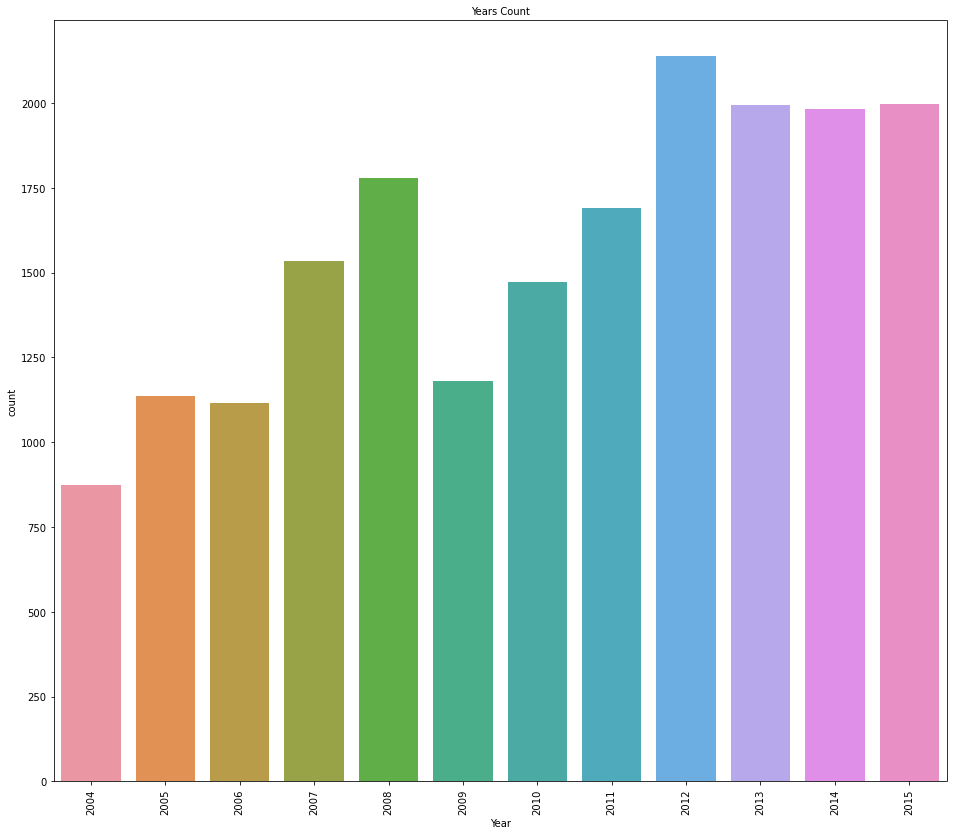

In [59]:
plt.figure(figsize=(16,14))
sbn.countplot(pyspark_df['Year'])
plt.title('Years Count', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [60]:
# count Years

pd.DataFrame(pyspark_df['Year'].value_counts())

,Year
2012,2137
2015,1998
2013,1995
2014,1981
2008,1780
2011,1690
2007,1534
2010,1473
2009,1180
2005,1136


In [61]:
# count IT

pd.DataFrame(pyspark_df['Year'].value_counts(normalize=True)*100)

,Year
2012,11.311666
2015,10.575905
2013,10.560025
2014,10.485920
2008,9.421978
2011,8.945585
2007,8.119839
2010,7.796951
2009,6.246030
2005,6.013127


C:\Users\Evvuga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


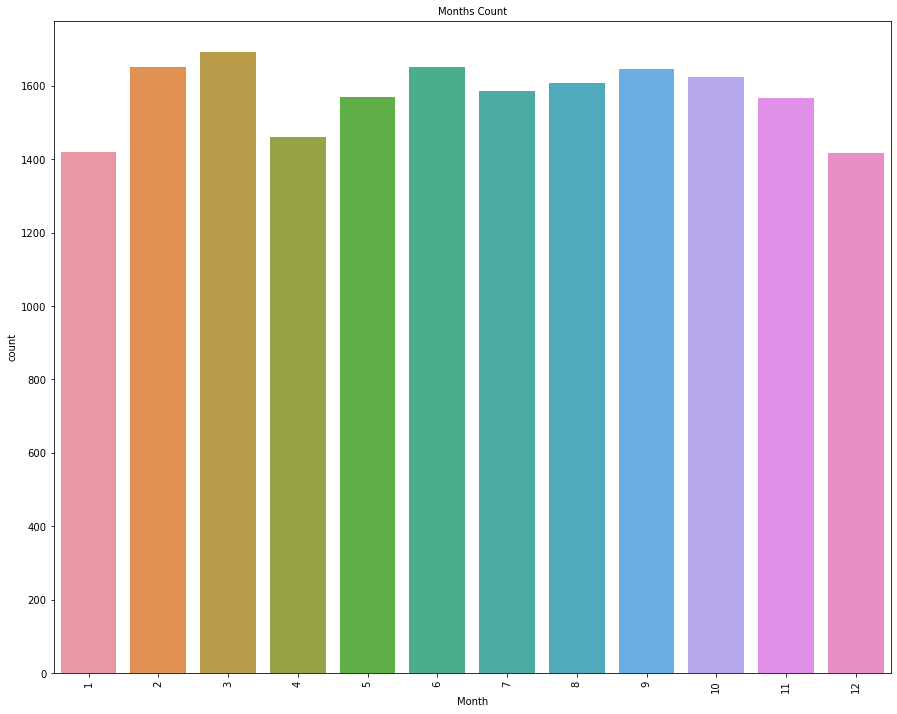

In [64]:
plt.figure(figsize=(15,12))
sbn.countplot(pyspark_df['Month'])
plt.title('Months Count', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [65]:
pd.DataFrame(pyspark_df['Month'].value_counts())

,Month
3,1693
2,1651
6,1651
9,1645
10,1625
8,1607
7,1585
5,1569
11,1566
4,1461


In [69]:
pyspark_df.nunique()

jobpost           18892
date               4382
Title              8636
Company            4554
StartDate          1186
Duration           1515
Location            759
JobDescription    12861
JobRequirment     14182
RequiredQual      16688
Salary             2692
ApplicationP      14187
OpeningDate        3344
Deadline           5202
AboutC             6016
Year                 12
Month                12
IT                    2
dtype: int64

In [48]:
# salary is dependant on education and experience

pyspark_df = pyspark_df.assign(Salary = pyspark_df['Salary'].astype(float))

ValueError: could not convert string to float: 'Salary is dependent on education, experience, and\r\ncapabilities, and will be discussed on a case-by-case basis.'

In [66]:
pd.DataFrame(pyspark_df['Month'].value_counts(normalize=True)*100)

,Month
3,8.961465
2,8.739149
6,8.739149
9,8.707389
10,8.601524
8,8.506246
7,8.389795
5,8.305103
11,8.289223
4,7.733432
